![](http://samyzaf.com/ML/imdb/imdb2.png)

# Анализ тональности и word2vec сетки

In [2]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

import matplotlib.pyplot as plt
%matplotlib inline

# выбрали random seed для воспроизводимости
np.random.seed(1337)

In [3]:
top_words = 5000             # ограниичимся словарём из 5000 самых частых слов
max_review_length = 500      # обрежем все отзывы до 500 слов
embedding_vector_length = 32 # размерность эмбендинга

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = top_words)

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

# как выглядит вектор
print(X_train[0][:20])

25000 train sequences
25000 test sequences
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]


В нашей базе данных все слова представлены в виде целых чисел. Каждое целое число эквивалентно какому-то определённому слову из отзыва.

![](http://samyzaf.com/ML/imdb/review1.png)

Если отзыв меньше 500 слов, дополним его до 500 пустотами. Это необходимо для корректной работы сетки.

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train[0][:20])

X_train shape: (25000, 500)
X_test shape: (25000, 500)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


![](http://samyzaf.com/ML/imdb/cnn4.png)

## Первая сетка! 

Эмбединг + LSTM

In [6]:
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.4f'%(scores[1]))

Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 303s 15ms/step - loss: 0.4770 - acc: 0.7673 - val_loss: 0.3742 - val_acc: 0.8386
Epoch 2/15
20000/20000 [==============================] - 285s 14ms/step - loss: 0.3324 - acc: 0.8616 - val_loss: 0.4588 - val_acc: 0.7860
Epoch 3/15
20000/20000 [==============================] - 285s 14ms/step - loss: 0.2776 - acc: 0.8912 - val_loss: 0.3365 - val_acc: 0.8556
Epoch 4/15
20000/20000 [==============================] - 286s 14ms/step - loss: 0.2427 - acc: 0.9074 - val_loss: 0.3457 - val_acc: 0.8696
Epoch 5/15
20000/20000 [==============================] - 290s 14ms/step - loss: 0.2670 - acc: 0.8910 - val_loss: 0.3879 - val_acc: 0.8588
Epoch 6/15
20000/20000 [==============================] - 308s 15ms/step - loss: 0.2023 - acc: 0.9231 - val_loss: 0.3465 - val_acc: 0.8598
Epoch 7/15
20000/20000 [==============================] - 298s 15ms/step - loss: 0.1909 - acc: 0.9248 - val_loss: 0.3

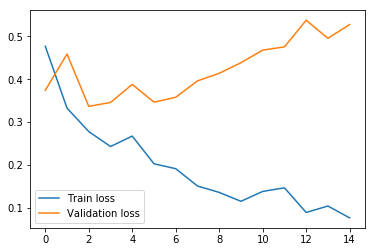

In [7]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Train loss', 'Validation loss'])

## Вторая сетка! 

Добавили свёрточный слой 1x1

In [8]:
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.4f'%(scores[1]))

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 157s 8ms/step - loss: 0.4181 - acc: 0.7989 - val_loss: 0.3189 - val_acc: 0.8706
Epoch 2/5
20000/20000 [==============================] - 155s 8ms/step - loss: 0.2487 - acc: 0.9021 - val_loss: 0.3000 - val_acc: 0.8714
Epoch 3/5
20000/20000 [==============================] - 154s 8ms/step - loss: 0.1913 - acc: 0.9274 - val_loss: 0.2913 - val_acc: 0.8818
Epoch 4/5
20000/20000 [==============================] - 155s 8ms/step - loss: 0.1572 - acc: 0.9440 - val_loss: 0.3100 - val_acc: 0.8832
Epoch 5/5
20000/20000 [==============================] - 156s 8ms/step - loss: 0.1275 - acc: 0.9551 - val_loss: 0.3407 - val_acc: 0.8746
Accuracy: 0.8705


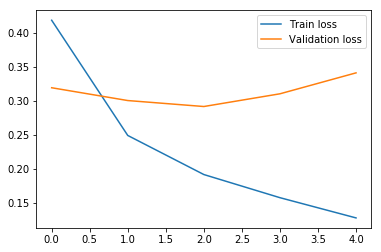

In [9]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Train loss', 'Validation loss'])

## Дополнительное чтиво: 

* [Статья с хабра про w2v.](https://habr.com/company/ods/blog/329410/) Там есть пример работы с переходами по сайтам, по аналогии можно работать с транзакциями. 
* [Ещё одна статья](https://habr.com/company/dca/blog/274027/) про LSTM и звёздные войны.